In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

In [4]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


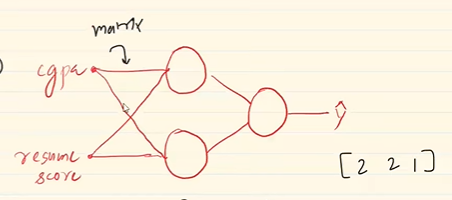

In [5]:
# we need above architecture of neurons for that we will pass 2,2,1 -> 2 neurons , 2 neurons , 1 neuron
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1 # weights initialized by 0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1)) # bias initialized by 0.0


  return parameters

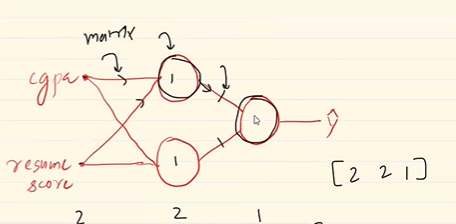

In [6]:
initialize_parameters([2,2,1])
# it will return W1 with 4 weights ( matrix in image )
# W2 with 2 weights next layer
# b1 - 2 biases of layer 1
# b2 - 1 bias of layer 2

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

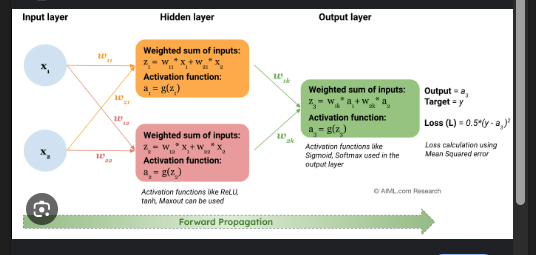

In [7]:
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b # dot product and add bias for linear forward

  return Z

In [31]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A,A_prev

In [9]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.32]]
****************************************


# AO is inputs 8,8 cgpa,resume_score

# W1 , b1 is initial weights and biases

# A1 is calculated with A0 , W1 , B1

# now A2 is calculated with A1 , W2 , B2

# A2 is final result

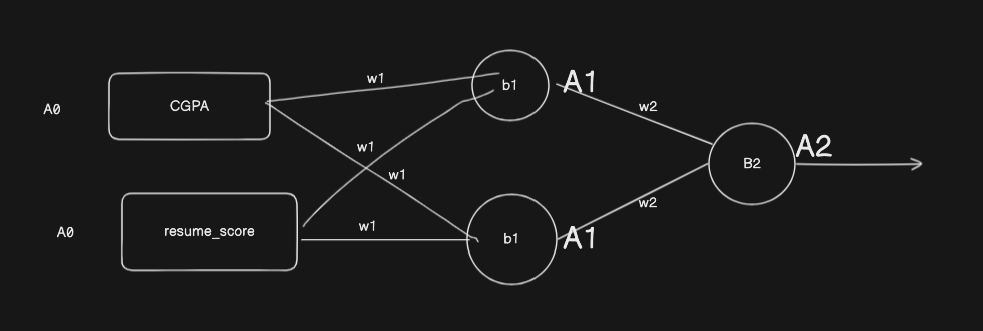

In [10]:
y_hat = y_hat[0][0]

In [11]:
y_hat

np.float64(0.32000000000000006)

In [12]:
A1

array([[1.6],
       [1.6]])

In [28]:
parameters    ## now weights and biases got updated

{'W1': array([[0.11385611, 0.11385611],
        [0.11385611, 0.11385611]]),
 'b1': array([[0.00173201],
        [0.00173201]]),
 'W2': array([[0.123552],
        [0.123552]]),
 'b2': array([[0.130912]])}

In [14]:
## second student
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[ 5]
 [12]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[1.7]
 [1.7]]
****************************************
A1:  [[1.7]
 [1.7]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.34]]
****************************************


In [29]:
update_parameters(parameters,y,y_hat,A1,X)

In [30]:
parameters # again weights and biases got chnaged

{'W1': array([[0.12182423, 0.12182423],
        [0.12182423, 0.12182423]]),
 'b1': array([[0.00272803],
        [0.00272803]]),
 'W2': array([[0.135328],
        [0.135328]]),
 'b2': array([[0.142688]])}

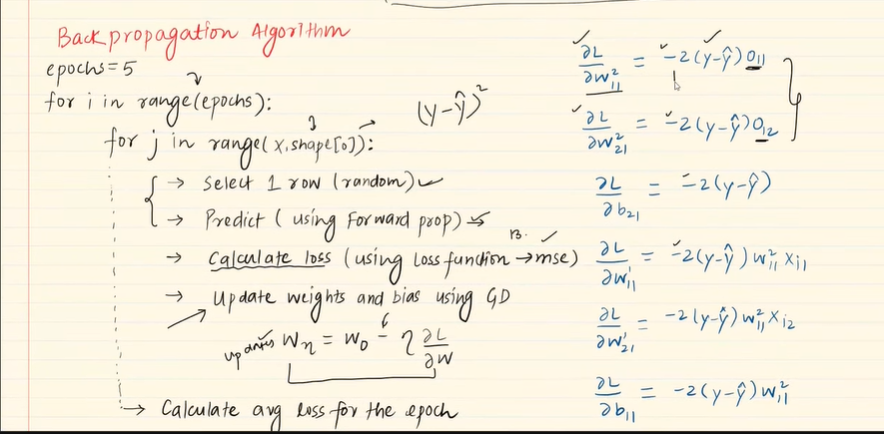

In [23]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [25]:
## 3rd student

X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)



A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.32]]
****************************************


In [19]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

A0:  [[7]
 [9]]
W1:  [[0.10658137 0.10658137]
 [0.10658137 0.10658137]]
b1:  [[0.00082267]
 [0.00082267]]
----------------------------------------
A1:  [[1.70612461]
 [1.70612461]]
****************************************
A1:  [[1.70612461]
 [1.70612461]]
W2:  [[0.111776]
 [0.111776]]
b2:  [[0.119136]]
----------------------------------------
A2:  [[0.50054357]]
****************************************


{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]),
 'b1': array([[0.0019667],
        [0.0019667]]),
 'W2': array([[0.12712927],
        [0.12712927]]),
 'b2': array([[0.13612818]])}

In [20]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

A0:  [[ 6]
 [10]]
W1:  [[0.11458955 0.1168776 ]
 [0.11458955 0.1168776 ]]
b1:  [[0.0019667]
 [0.0019667]]
----------------------------------------
A1:  [[1.83539945]
 [1.87200826]]
****************************************
A1:  [[1.83539945]
 [1.87200826]]
W2:  [[0.12712927]
 [0.12712927]]
b2:  [[0.13612818]]
----------------------------------------
A2:  [[0.6074482]]
****************************************


{'W1': array([[0.12409711, 0.13272353],
        [0.12412266, 0.13276611]]),
 'b1': array([[0.00355129],
        [0.00355555]]),
 'W2': array([[0.14692424],
        [0.14731907]]),
 'b2': array([[0.15810417]])}

In [21]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

A0:  [[ 5]
 [12]]
W1:  [[0.12409711 0.13272353]
 [0.12412266 0.13276611]]
b1:  [[0.00355129]
 [0.00355555]]
----------------------------------------
A1:  [[2.11350869]
 [2.26036654]]
****************************************
A1:  [[2.11350869]
 [2.26036654]]
W2:  [[0.14692424]
 [0.14731907]]
b2:  [[0.15810417]]
----------------------------------------
A2:  [[0.80162493]]
****************************************


{'W1': array([[0.13482804, 0.15847776],
        [0.1349909 , 0.15884991]]),
 'b1': array([[0.00569748],
        [0.0057292 ]]),
 'W2': array([[0.17312488],
        [0.17534027]]),
 'b2': array([[0.18773702]])}

In [33]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters


# we had initalized all weights and biases as 0.1 and 0
# now it all changed

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}

# same implementation using KEras

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [35]:


model = Sequential()


model.add(Dense(2,activation='linear',input_dim = 2))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.get_weights()  #keras does not use 0.1 and 0 for weight and biases it assigns randomly

[array([[ 0.45350206,  0.01409841],
        [-1.1327068 ,  0.42225325]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.169461  ],
        [-0.34175062]], dtype=float32),
 array([0.], dtype=float32)]

In [38]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [39]:
model.fit(df[['cgpa', 'profile_score']].values,df[['lpa']].values,epochs=75,verbose=1,batch_size=2)

Epoch 1/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.7306
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.2903 
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.3722 
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.9875 
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.0774 
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9640
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2854
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.4527
Epoch 9/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.6396
Epoch 10/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.5784
Epoch 11/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.9948
Epoch 12/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.1579
Epoch 13/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.3978
Epoch 14/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.6517
Epoch 15/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6231
Epoch 16/75
2/2 ━━━━━━━━━━━━━━

In [40]:
model.get_weights() # these are final weights

[array([[ 0.5068806 ,  0.06910669],
        [-1.0650985 ,  0.4937245 ]], dtype=float32),
 array([0.06215173, 0.0651626 ], dtype=float32),
 array([[-1.098915 ],
        [-0.4126867]], dtype=float32),
 array([-0.06284519], dtype=float32)]